In [24]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

In [25]:
def toNumeric(df): 
    if 'gender' in df.columns:
        df['gender'].replace('female',0,inplace=True)
        df['gender'].replace('male',1,inplace=True)
    if 'test_indication' in df.columns:
        df['test_indication_other'] = df['test_indication'].apply(lambda x: 1 if x =='Other' else 0)
        df['test_indication_abroad'] = df['test_indication'].apply(lambda x: 1 if x =='Abroad' else 0)
        df['test_indication_contact'] = df['test_indication'].apply(lambda x: 1 if x =='Contact with confirmed' else 0)
        df.drop(['test_indication'], axis=1, inplace=True)
    if 'age_60_and_above' in df.columns:
        df['age_60_and_above'].replace('No',0,inplace=True)
        df['age_60_and_above'].replace('Yes',1,inplace=True)
    if 'corona_result' in df.columns:
        df['corona_result'].replace('positive',1,inplace=True)
        df['corona_result'].replace('negative',0,inplace=True)
    return df

In [26]:
X_train = pd.read_csv('X_train.csv', index_col=0)
X_val = pd.read_csv('X_val.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
y_val = pd.read_csv('y_val.csv', index_col=0)

test_df = pd.read_csv('test_df.csv', index_col=0)
y_test = pd.DataFrame(test_df['corona_result'])
X_test = test_df.drop('corona_result',axis=1)

# Convert to numeric input for neural net
X_train.drop(['test_date','DateTime'], axis=1, inplace=True)
X_test.drop(['test_date','DateTime'], axis=1, inplace=True)

X_train = toNumeric(X_train)
X_test = toNumeric(X_test)
y_train = toNumeric(y_train)
y_test = toNumeric(y_test)

Epoch 1/30
1330/1330 [==============================] - 2s 1ms/step - loss: 0.3042 - accuracy: 0.8983
Epoch 2/30
1330/1330 [==============================] - 2s 1ms/step - loss: 0.2231 - accuracy: 0.9099
Epoch 3/30
1330/1330 [==============================] - 2s 1ms/step - loss: 0.2143 - accuracy: 0.9109
Epoch 4/30
1330/1330 [==============================] - 2s 2ms/step - loss: 0.2096 - accuracy: 0.9111
Epoch 5/30
1330/1330 [==============================] - 2s 1ms/step - loss: 0.2064 - accuracy: 0.9117: 0s - los
Epoch 6/30
1330/1330 [==============================] - 1s 1ms/step - loss: 0.2040 - accuracy: 0.9115
Epoch 7/30
1330/1330 [==============================] - 2s 1ms/step - loss: 0.2024 - accuracy: 0.9124
Epoch 8/30
1330/1330 [==============================] - 1s 1ms/step - loss: 0.2013 - accuracy: 0.9127
Epoch 9/30
1330/1330 [==============================] - 2s 1ms/step - loss: 0.2005 - accuracy: 0.9132
Epoch 10/30
1330/1330 [==============================] - 2s 1ms/step - l

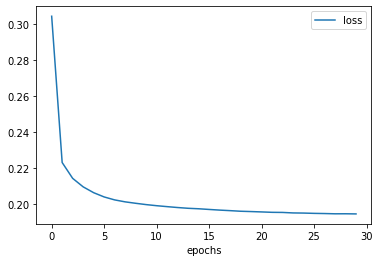

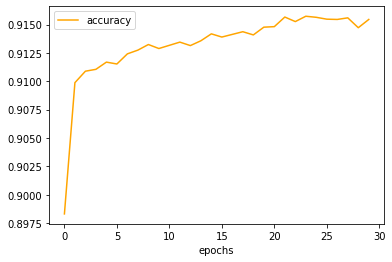

In [27]:
## Create and Train Neural Net Model

model = tf.keras.Sequential([
 
  # Flatten Layer that converts images to 1D array
#   tf.keras.layers.Flatten(),
   
  # Hidden Layer with 512 units and relu activation
  tf.keras.layers.Dense(units=8, activation='relu', input_dim=len(X_train.columns)),
  # tf.keras.layers.Dense(units=64, activation='relu', input_dim=len(X_train.columns)),
  tf.keras.layers.Dense(units=8, activation='relu', input_dim=len(X_train.columns)),
   
  # Output Layer with 10 units for 10 classes and softmax activation
  tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(
  loss = 'binary_crossentropy',
  optimizer = 'sgd',
  metrics = ['accuracy']
)
 
history = model.fit(
  x = X_train,
  y = y_train,
  epochs = 30
)
# Showing plot for loss
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.legend(['loss'])
plt.show()
 
# Showing plot for accuracy
plt.plot(history.history['accuracy'], color='orange')
plt.xlabel('epochs')
plt.legend(['accuracy'])
plt.show()

49742
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     46138
           1       0.41      0.14      0.21      3604

    accuracy                           0.92     49742
   macro avg       0.67      0.56      0.59     49742
weighted avg       0.90      0.92      0.91     49742

[[45399   739]
 [ 3092   512]]
ROC AUC  0.5630236035126778


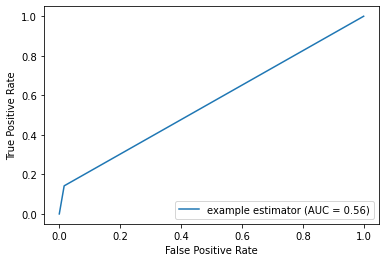

In [28]:
## Test and Evaluate Neural Net
def sig(num):
    if num < 0.5:
        return 0
    else:
        return 1
r_predictions = model.predict(X_test)
predictions = []
for p in r_predictions:
    predictions.append([sig(p)])
print(len(predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print('ROC AUC ', roc_auc)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

